In [4]:
%matplotlib inline
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM
from sklearn.decomposition import PCA
from sklearn.neighbors.kde import KernelDensity
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import preprocessing

Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
file = "/Users/jwalker/Documents/Altmetrics research/data2.csv";

In [8]:
df=pd.read_csv(file, sep=',',header=None)

In [9]:
X = df.values

In [10]:
X = np.delete(X, 0, 0)

In [11]:
X = np.delete(X, 0, 1)

In [12]:
len(X)

1899

In [13]:
# function to plot a scatter plot graph, given two vectors.
def plot_data(x, y):
    plt.plot(x, y, ".")
    plt.show()

In [14]:
data = PCA(n_components=1).fit_transform(X[:, 0:11])

In [15]:
#data

In [16]:
X = X.astype(int)

In [17]:
data = np.column_stack((data, X[:,12]))
data = StandardScaler().fit_transform(data)

In [18]:
#plt.scatter(data[:, 0], data[:, 1])

In [19]:
#len(X)

In [20]:
#len(y)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(data[:, 0], data[:,1], test_size=0.3)

In [22]:
len(y_train)

1329

In [23]:
len(x_train)

1329

In [24]:
#hist_test, bin_edges_test = np.histogram(X[:,12].astype(int), bins = range(10))

In [25]:
#plt.bar(bin_edges_train[:-1], hist_train, width = 1)
#plt.xlim(min(bin_edges_train), max(bin_edges_train))
#plt.show()  

In [26]:
#plt.bar(bin_edges_test[:-1], hist_test, width = 1)
#plt.xlim(min(bin_edges_test), max(bin_edges_test))
#plt.show()  

In [27]:

regr = linear_model.LinearRegression()

#logreg = linear_model.LogisticRegression(C=1e5)

kr = GridSearchCV(KernelRidge(kernel='rbf'), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})


In [28]:
regr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

#logreg.fit(y_train.reshape(-1, 1), x_train.reshape(-1, 1))

t0 = time.time()
kr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

/Users/jwalker/Library/Python/3.6/lib/python/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


KRR complexity and bandwidth selected and model fitted in 7.679 s


In [29]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(x_test.reshape(-1, 1)) - y_test.reshape(-1, 1)) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1)))

t0 = time.time()
y_kr = kr.predict(x_test.reshape(-1, 1))
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (x_test.shape[0], kr_predict))

Coefficients: 
 [[ 0.72991017]]
Mean squared error: 0.32
Variance score: -0.55
KRR prediction for 570 inputs in 0.011 s


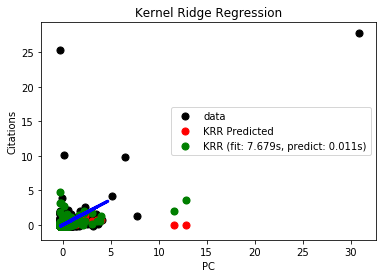

In [30]:
plt.scatter(x_test, y_test,  color='black')
plt.plot(y_test.reshape(-1, 1), regr.predict(y_test.reshape(-11, 1)), color='blue',
         linewidth=3)


#plt.figure(figsize=(30,20))
plt.scatter(x_train, y_train, c='k', label='data', zorder=1, s=50)
plt.scatter(x_test, y_kr, c='r', s=50, label='KRR Predicted')
plt.scatter(x_test, y_test, c='g', s=50, label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('PC')
plt.ylabel('Citations')
plt.title('Kernel Ridge Regression')
plt.legend()
plt.show()

In [34]:
print("explained variance score: {}".format(explained_variance_score(y_test, y_kr)))
print("mean absolute error: {}".format(mean_absolute_error(y_test, y_kr)))
print("mean squared error: {}".format(mean_squared_error(y_test, y_kr)))
print("median absolute error:{}".format(median_absolute_error(y_test, y_kr)))
print("r2 score: {}".format(r2_score(y_test, y_kr)))

explained variance score: 0.1542984840690509
mean absolute error: 0.1840623184778158
mean squared error: 0.17613834895688016
median absolute error:0.11281090703574465
r2 score: 0.15313825716751706
